# Calibration de l'atténuateur #

### Importation des bibliothèques ###

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import argrelmin, argrelmax
from sklearn import preprocessing
import plotly.express as px
import plotly.graph_objects as go

### Définition des fonctions ###

In [5]:
def transmission(theta, A, B, C, phi):
    return A*(np.cos(C*(theta-phi)*(np.pi/180)))**2+B

def theta(transmission, A, B, C, phi):
    return np.array([phi+(1/C)*np.arccos(np.sqrt((((element*A)/100)-B)/A))*(-180/np.pi) for element in transmission])

### Traitement des données ###

In [8]:
# Extracting data
def extracting_data(path):
        df = pd.read_csv(path,
                         decimal='.',
                         na_values='New Data Not Available',
                         squeeze=True
                        )
        df.dropna(inplace=True)
        
        return df

# Process data
def process_data(path):
    df = extracting_data(path)
    
    min_idx = argrelmin(np.array(df.values))
    max_idx = argrelmax(np.array(df.values))
    for i in range (min(len(min_idx[0]), len(max_idx[0]))):
        if (abs(min_idx[0][i]-min_idx[0][i+1])>=10):
            if (abs(max_idx[0][i]-max_idx[0][i+1])>=10):
                if (abs(min_idx[0][i+1]-max_idx[0][i])>=10):
                    bound_sup = min_idx[0][i+1]
                    bound_inf = max_idx[0][i]
                    break
                continue
            continue
            
    df_index = [i for i in range(0, len(df[bound_inf:bound_sup]), 1)]
    df_values = [((element-df.values[bound_sup])/(df.values[bound_inf]-df.values[bound_sup])) for element in df[bound_inf:bound_sup]]
                                          
    return [df_index, df_values]

# Fiting data
def fitting_data(path, mode):
    df_theta, df_energy = process_data(path)
    
    if mode == 'transmission':
        #Transmission model
        p0 = [1, 1, 1, 1]
        df_theta = [df_theta[i] for i in range(len(df_energy)) if df_energy[i] > 0.]
        df_energy = [element for element in df_energy if element > 0.]
        popt, pcov = curve_fit(transmission, df_theta, df_energy, p0, method='dogbox', bounds=((-np.inf, -np.inf, -np.inf, -np.inf), (np.inf, np.inf, np.inf, np.inf)))
        df_model_tr = transmission(df_theta, *popt)
        df_model_th = theta(df_energy, *popt)
        df_model_th = (df_model_th-df_model_th.min())/(df_model_th.max()-df_model_th.min())
    
    elif mode == 'theta':
        #Theta model
        p0 = [1, 1, 1, 1]
        df_theta = [df_theta[i] for i in range(len(df_energy)) if df_energy[i] > 0.]
        df_energy = [element for element in df_energy if element > 0.]
        popt, pcov = curve_fit(theta, df_energy, df_theta, p0, method='dogbox', bounds=((-np.inf, -np.inf, -np.inf, -np.inf), (np.inf, np.inf, np.inf, np.inf)))
        df_model_tr = transmission(df_theta, *popt)
        df_model_th = theta(df_energy, *popt)   
        df_model_th = (df_model_th-df_model_th.min())/(df_model_th.max()-df_model_th.min())
    
    print(*popt)
    return [df_theta, df_energy, df_model_tr, df_model_th]

# Plot result
def plotting_data(path, mode):
    df_index, df_values, df_model_tr, df_model_th = fitting_data(path, mode)
    fig1 = go.Figure()
    fig2 = go.Figure()
    if mode=='transmission':
        fig1.update_layout(title_x=0.5,
                           title_text='Fitting transmission model',
                           showlegend=True,
                           legend_title_text='Legend',
                           xaxis=dict(title='theta (°)'),
                           yaxis=dict(title='transmission (a.u)')
                          )
        fig1.add_trace(go.Scatter(x=df_index,
                                  y=df_values,
                                  name='data'
                                 )
                      )
        fig1.add_trace(go.Scatter(x=df_index,
                                  y=df_model_tr,
                                  name='model'
                                 )
                      )
        fig2.update_layout(title_x=0.5,
                           title_text='Fitting theta model',
                           showlegend=True,
                           legend_title_text='Legend',
                           xaxis=dict(title='transmission (a.u)'),
                           yaxis=dict(title='theta (°)')
                          )
        fig2.add_trace(go.Scatter(x=df_values,
                                  y=df_index,
                                  name='data'
                                 )
                      )
        fig2.add_trace(go.Scatter(x=df_model_th,
                                  y=df_index,
                                  name='model'
                                 )
                      )
    if mode=='theta':
        fig1.update_layout(title_x=0.5,
                           title_text='Fitting transmission model',
                           showlegend=True,
                           legend_title_text='Legend',
                           xaxis=dict(title='theta (°)'),
                           yaxis=dict(title='transmission (a.u)')
                          )
        fig1.add_trace(go.Scatter(x=df_index,
                                  y=df_values,
                                  name='data'
                                 )
                      )
        fig1.add_trace(go.Scatter(x=df_index,
                                  y=df_model_tr,
                                  name='model'
                                 )
                      )
        fig2.update_layout(title_x=0.5,
                           title_text='Fitting theta model',
                           showlegend=True,
                           legend_title_text='Legend',
                           xaxis=dict(title='transmission (a.u)'),
                           yaxis=dict(title='theta (°)')
                          )
        fig2.add_trace(go.Scatter(x=df_values,
                                  y=df_index,
                                  name='data'
                                 )
                      )
        fig2.add_trace(go.Scatter(x=df_model_th,
                                  y=df_index,
                                  name='model'
                                 )
                      )
    fig1.show()
    fig2.show()
    return 1

1.1022754309335328 -0.09983695234780054 1.8313355702141711 -2.583147072015038


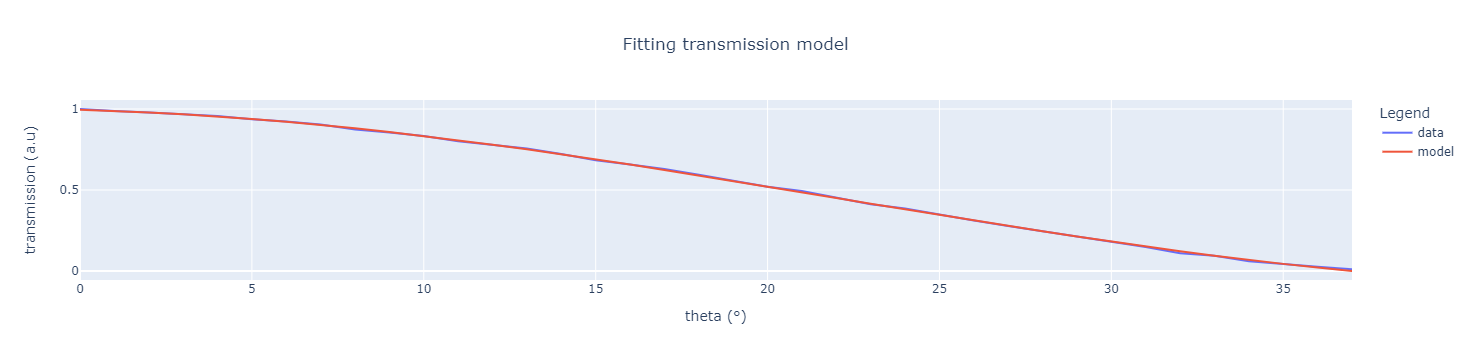

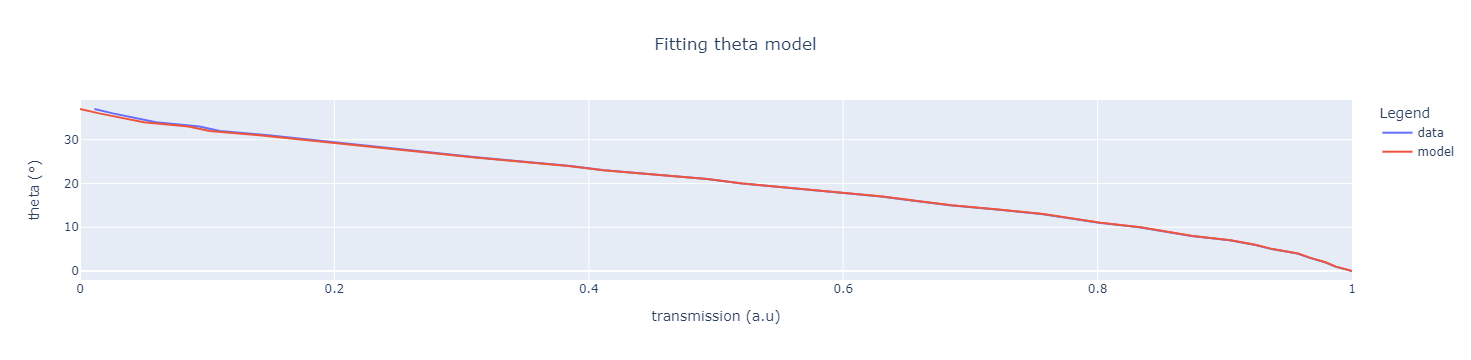

C:\Users\T0264735\MyApp\Python\Python36\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in sqrt



ValueError: Residuals are not finite in the initial point.

In [10]:
path = 'plotting_data(path, mode='transmission')
plotting_data(path, mode='theta')